In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Data Preparation

In [2]:
# assign data to variable 'data'

path_to_data = "data/Metro_Interstate_Traffic_Volume.csv"
data = pd.read_csv(path_to_data)

data.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [3]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              61 non-null     object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
# unique value for column 'holiday'
data['holiday'].unique()

array([nan, 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [5]:
data['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

In [6]:
data['clouds_all']

0        40
1        75
2        90
3        90
4        75
         ..
48199    75
48200    90
48201    90
48202    90
48203    90
Name: clouds_all, Length: 48204, dtype: int64

## Feature Engineering

### 1. Ekstraksi waktu menjadi banyak, seperti day, month, year, isWeekend, dll

In [7]:
# Konversi data 'date_time' ke tipe datetime
data['date_time'] = pd.to_datetime(data['date_time'], format='%d-%m-%Y %H:%M')

# Ekstraksi fitur waktu
data['hour'] = data['date_time'].dt.hour
data['day_of_week'] = data['date_time'].dt.dayofweek  # 0=Senin, 6=Minggu
data['day_of_month'] = data['date_time'].dt.day
data['month'] = data['date_time'].dt.month
data['year'] = data['date_time'].dt.year
data['is_weekend'] = data['date_time'].dt.weekday >= 5  # Sabtu dan Minggu



data = data.drop(['date_time'], axis=1)

data.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,hour,day_of_week,day_of_month,month,year,is_weekend
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,9,1,2,10,2012,False
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,10,1,2,10,2012,False
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,11,1,2,10,2012,False
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,12,1,2,10,2012,False
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,13,1,2,10,2012,False


### 2. Mengubah Satuan Suhu dari Kelvin Menjadi Celcius

In [8]:
# rumus kelvin -> celcius
data['temp_celcius'] = data['temp'] - 273.1

data.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,hour,day_of_week,day_of_month,month,year,is_weekend,temp_celcius
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,9,1,2,10,2012,False,15.18
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,10,1,2,10,2012,False,16.26
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,11,1,2,10,2012,False,16.48
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,12,1,2,10,2012,False,17.03
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,13,1,2,10,2012,False,18.04


### 3. Buat Fitur Kategori pada Kolom 'clouds_all'

In [9]:
# buat variabel bins untuk menyimpan persentasi yang di harapkan
bins = [0, 30, 70, 100] 
labels = ['low', 'medium', 'high']

# membuat kolom baru bernama 'cloud_categories'
data['cloud_categories'] = pd.cut(data['clouds_all'], bins=bins, labels=labels, include_lowest=True)

data.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,hour,day_of_week,day_of_month,month,year,is_weekend,temp_celcius,cloud_categories
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,9,1,2,10,2012,False,15.18,medium
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,10,1,2,10,2012,False,16.26,high
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,11,1,2,10,2012,False,16.48,high
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,12,1,2,10,2012,False,17.03,high
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,13,1,2,10,2012,False,18.04,high


### 4. Menggabungkan holiday dengan is_weekend apabila hari tersebut berbarengan

In [10]:
# kolom baru yang mengindikasikan bahwa pada saat weekend juga ada hari libur nasional
data['is_weekend_and_holiday'] = (data['is_weekend'] & data['holiday'].notnull())

# tampilkan data
data[['is_weekend', 'holiday', 'is_weekend_and_holiday']]

data['is_weekend_and_holiday'].unique()

array([False])

Dapat dilihat bahwa ternyata tidak ada hari libur nasional yang dibarengi dengan weekend pada dataset kali ini.

### 5. Buat fitur baru bernama 'is_precipitation' yang menggabungkan kolom rain_1h dan snow_1h

In [11]:
# bernilai true jika salah satu dari rain_1h dan snow_1h bernilai > 0 mm
data['is_precipitation'] = (data['rain_1h'] > 0) | (data['snow_1h'] > 0)

# tampilakan data
data[['rain_1h', 'snow_1h', 'is_precipitation']]

,rain_1h,snow_1h,is_precipitation
0,0.0,0.0,False
1,0.0,0.0,False
2,0.0,0.0,False
3,0.0,0.0,False
4,0.0,0.0,False
...,...,...,...
48199,0.0,0.0,False
48200,0.0,0.0,False
48201,0.0,0.0,False
48202,0.0,0.0,False


### 6. Membuat Lag Feature untuk Kolom Traffic Volume

ini agar model mudah untuk memprediksi traffic volume kedepannya melihat dari pola 'apakah 1 jam sebelumnya traffic volume besar?' jika ya, maka model akan mem-predict traffic volume yang besar pula.

In [12]:
# mengurutkan data
data = data.sort_values(by=['year', 'month', 'day_of_month', 'hour'])

# assign kolom baru untuk lag feature
data['traffic_volume_lag1'] = data['traffic_volume'].shift(1) # 1 jam sebelumnya
data['traffic_volume_lag24'] = data['traffic_volume'].shift(24) # 24 jam sebelumnya
data['traffic_volume_lag168'] = data['traffic_volume'].shift(168) # 7 hari sebelumnya

# menampilkan data terbaru
print(data.head())

   traffic_volume holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0            5545     NaN  288.28      0.0      0.0          40       Clouds   
1            4516     NaN  289.36      0.0      0.0          75       Clouds   
2            4767     NaN  289.58      0.0      0.0          90       Clouds   
3            5026     NaN  290.13      0.0      0.0          90       Clouds   
4            4918     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description  hour  day_of_week  ...  month  year  is_weekend  \
0    scattered clouds     9            1  ...     10  2012       False   
1       broken clouds    10            1  ...     10  2012       False   
2     overcast clouds    11            1  ...     10  2012       False   
3     overcast clouds    12            1  ...     10  2012       False   
4       broken clouds    13            1  ...     10  2012       False   

   temp_celcius  cloud_categories is_weekend_and_holiday  is_precipitation

### 7. Encoding Categorical Data

- **Menggunakan Frequency Encoding untuk Kolom weather_description**

In [13]:
# deklarasi frequensi dari kolom weather_prediction
frequency = data['weather_description'].value_counts()
data['weather_description_encoded'] = data['weather_description'].map(frequency)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   traffic_volume               48204 non-null  int64   
 1   holiday                      61 non-null     object  
 2   temp                         48204 non-null  float64 
 3   rain_1h                      48204 non-null  float64 
 4   snow_1h                      48204 non-null  float64 
 5   clouds_all                   48204 non-null  int64   
 6   weather_main                 48204 non-null  object  
 7   weather_description          48204 non-null  object  
 8   hour                         48204 non-null  int32   
 9   day_of_week                  48204 non-null  int32   
 10  day_of_month                 48204 non-null  int32   
 11  month                        48204 non-null  int32   
 12  year                         48204 non-null  int32   
 13  i

- **Menggunakan OneHotEncoding untuk encode kolom weather-main**

In [15]:
# One-hot encoding untuk kolom 'weather_main'
import pickle
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(data[['weather_main']])
one_hot_encoded = encoder.transform(data[['weather_main']]).toarray()

# Mendapatkan nama kolom hasil encoding
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['weather_main']))

# Menggabungkan hasil one-hot encoding dengan variabel data
data = pd.concat([data, one_hot_encoded_df], axis=1)

# Menghapus kolom asli yang telah di-encode jika tidak lagi diperlukan
data = data.drop(columns=['weather_main'])

with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)
# Cek hasilnya
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   traffic_volume               48204 non-null  int64   
 1   holiday                      61 non-null     object  
 2   temp                         48204 non-null  float64 
 3   rain_1h                      48204 non-null  float64 
 4   snow_1h                      48204 non-null  float64 
 5   clouds_all                   48204 non-null  int64   
 6   weather_description          48204 non-null  object  
 7   hour                         48204 non-null  int32   
 8   day_of_week                  48204 non-null  int32   
 9   day_of_month                 48204 non-null  int32   
 10  month                        48204 non-null  int32   
 11  year                         48204 non-null  int32   
 12  is_weekend                   48204 non-null  bool    
 13  t

- **Encode kolom cloud_categories dengan ordinal encoding**

In [16]:
# memastikan bahwa data sudah ter sort dengan baik
data['cloud_categories'] = pd.Categorical(data['cloud_categories'], categories=['low', 'medium', 'high'], ordered=True)

# encode
# Mengonversi kategori ordinal menjadi numerik
data['cloud_categories_encoded'] = data['cloud_categories'].cat.codes

# Cek hasil encoding
print(data[['cloud_categories', 'cloud_categories_encoded']].head())

  cloud_categories  cloud_categories_encoded
0           medium                         1
1             high                         2
2             high                         2
3             high                         2
4             high                         2


- **Encode kolom holiday menggunakan frequency encode, dan isi null value dengan 'no holiday'**

In [17]:
# isi missing value dengan 'No Holiday'
data['holiday'] = data['holiday'].fillna('No Holiday')

frequency = data['holiday'].value_counts()
data['holiday_encoded'] = data['holiday'].map(frequency)

data[['holiday', 'holiday_encoded']]

,holiday,holiday_encoded
0,No Holiday,48143
1,No Holiday,48143
2,No Holiday,48143
3,No Holiday,48143
4,No Holiday,48143
...,...,...
48199,No Holiday,48143
48200,No Holiday,48143
48201,No Holiday,48143
48202,No Holiday,48143


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   traffic_volume               48204 non-null  int64   
 1   holiday                      48204 non-null  object  
 2   temp                         48204 non-null  float64 
 3   rain_1h                      48204 non-null  float64 
 4   snow_1h                      48204 non-null  float64 
 5   clouds_all                   48204 non-null  int64   
 6   weather_description          48204 non-null  object  
 7   hour                         48204 non-null  int32   
 8   day_of_week                  48204 non-null  int32   
 9   day_of_month                 48204 non-null  int32   
 10  month                        48204 non-null  int32   
 11  year                         48204 non-null  int32   
 12  is_weekend                   48204 non-null  bool    
 13  t

- **Handle missing value dari traffic_volumelag1, traffic_volumelag24, traffic_volumelag168**

In [19]:
# Imputasi dengan 0
data[['traffic_volume_lag1', 'traffic_volume_lag24', 'traffic_volume_lag168']] = data[['traffic_volume_lag1', 'traffic_volume_lag24', 'traffic_volume_lag168']].fillna(0)

data.isnull().sum()

traffic_volume                 0
holiday                        0
temp                           0
rain_1h                        0
snow_1h                        0
clouds_all                     0
weather_description            0
hour                           0
day_of_week                    0
day_of_month                   0
month                          0
year                           0
is_weekend                     0
temp_celcius                   0
cloud_categories               0
is_weekend_and_holiday         0
is_precipitation               0
traffic_volume_lag1            0
traffic_volume_lag24           0
traffic_volume_lag168          0
weather_description_encoded    0
weather_main_Clear             0
weather_main_Clouds            0
weather_main_Drizzle           0
weather_main_Fog               0
weather_main_Haze              0
weather_main_Mist              0
weather_main_Rain              0
weather_main_Smoke             0
weather_main_Snow              0
weather_ma

### 7. Handle Outlier

- **Menggunakan box plot untuk mengetahui mana outliernya**

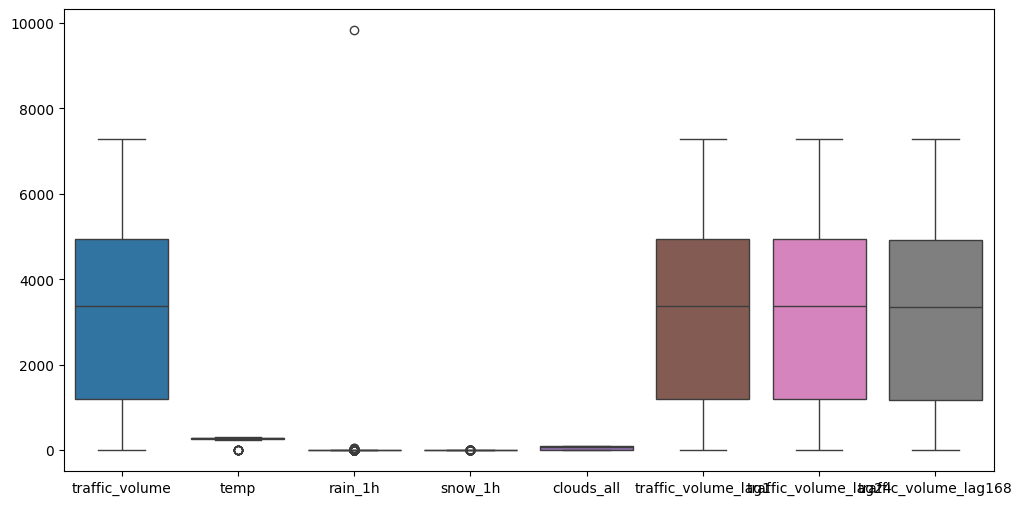

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi outlier dengan boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 
                     'traffic_volume_lag1', 'traffic_volume_lag24', 'traffic_volume_lag168']])
plt.show()

In [21]:
# inisiasi numerical columns
numerical_columns = ['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 
                     'traffic_volume_lag1', 'traffic_volume_lag24', 'traffic_volume_lag168']

# Menghitung Q1, Q3, dan IQR
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi outlier
outliers = (data[numerical_columns] < lower_bound) | (data[numerical_columns] > upper_bound)

# Menampilkan jumlah outlier pada setiap kolom
print(outliers.sum())

traffic_volume              0
temp                       10
rain_1h                  3467
snow_1h                    63
clouds_all                  0
traffic_volume_lag1         0
traffic_volume_lag24        0
traffic_volume_lag168       0
dtype: int64


In [22]:
# Menghapus baris yang mengandung outlier
data_cleaned = data[~(outliers.any(axis=1))]

# Mengecek jumlah baris setelah penghapusan
print(data_cleaned.shape)

(44668, 34)


In [23]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44668 entries, 0 to 48203
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   traffic_volume               44668 non-null  int64   
 1   holiday                      44668 non-null  object  
 2   temp                         44668 non-null  float64 
 3   rain_1h                      44668 non-null  float64 
 4   snow_1h                      44668 non-null  float64 
 5   clouds_all                   44668 non-null  int64   
 6   weather_description          44668 non-null  object  
 7   hour                         44668 non-null  int32   
 8   day_of_week                  44668 non-null  int32   
 9   day_of_month                 44668 non-null  int32   
 10  month                        44668 non-null  int32   
 11  year                         44668 non-null  int32   
 12  is_weekend                   44668 non-null  bool    
 13  temp_c

## Build and Train Linear Regression Model

- **Split and Transform Data**

In [24]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler


X = data_cleaned.drop(columns=['traffic_volume', 'cloud_categories', 'holiday', 'weather_description']) # feature
y = data_cleaned['traffic_volume']

# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# scale the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- **Hyperparameter Tuning Model**

In [25]:
import xgboost as xgb
from sklearn.model_selection import ParameterGrid, KFold
from sklearn.metrics import r2_score

# Parameter grid untuk pencarian hyperparameter manual
# param_grid = {
#     'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 7, 9, 11],
#     'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#     'min_child_weight': [1, 2, 3, 4, 5]
# }

# # List untuk menyimpan hasil
# best_score = -float('inf')
# best_params = {}

# # Parameter grid untuk pencarian hyperparameter manual
# for params in ParameterGrid(param_grid):
#     # Buat DMatrix dari data
#     dtrain = xgb.DMatrix(X_train, label=y_train)
#     dtest = xgb.DMatrix(X_test, label=y_test)
    
#     # Tambahkan parameter untuk XGBoost
#     xgb_params = {
#         'objective': 'reg:squarederror',
#         'tree_method': 'hist',
#         'device': 'cuda',
#         'eval_metric': 'rmse',
#         **params  # Menambahkan parameter dari param_grid
#     }
    
#     # Latih model dengan parameter saat ini
#     model = xgb.train(
#         params=xgb_params,
#         dtrain=dtrain,
#         num_boost_round=100  # Menentukan jumlah iterasi boosting
#     )
    
#     # Prediksi dengan model
#     y_pred = model.predict(dtest)
    
#     # Evaluasi model
#     score = r2_score(y_test, y_pred)
    
#     if score > best_score:
#         best_score = score
#         best_params = params

# print(f"Best Params: {best_params} - R^2 Score: {best_score}")
print("Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.9} - R^2 Score: 0.9812232286259681")

Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.9} - R^2 Score: 0.9812232286259681


- **Train Model Using Best Parameter**

In [26]:
from xgboost import XGBRegressor

best_model = XGBRegressor(colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 9, min_child_weight= 1, subsample= 0.9, n_estimators=100, random_state=15)

best_model.fit(X_train, y_train)

y_preds = best_model.predict(X_test)

print('done')

done


- **Evaluate Model using R Squarred and Mean Squared Error**

In [27]:
from sklearn.metrics import mean_squared_error
# Evaluasi model
mse = mean_squared_error(y_test, y_preds)
r2 = r2_score(y_test, y_preds)
r2_percentage = round(r2 * 100, 2)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"R^2 Accuracy Percentage: {r2_percentage}%")

Mean Squared Error: 72620.91460007595
R^2 Score: 0.9815645283094719
R^2 Accuracy Percentage: 98.16%


- **KFold Validation**

In [28]:
# KFold cross-validation untuk evaluasi model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_scores = []
val_scores = []

for train_index, val_index in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    best_model.fit(X_train_fold, y_train_fold)
    train_scores.append(best_model.score(X_train_fold, y_train_fold))
    val_scores.append(best_model.score(X_val_fold, y_val_fold))

print("Train scores (KFold):", train_scores)
print("Validation scores (KFold):", val_scores)

Train scores (KFold): [0.9940890793631872, 0.9942500725436911, 0.9941449937443427, 0.9941838206832638, 0.9942812630121552]
Validation scores (KFold): [0.9813636092279693, 0.9820243393651593, 0.9821903067442981, 0.9806252765639524, 0.9829568906139031]


- **Visualisasi Extreme Gradient Boost Regressor**

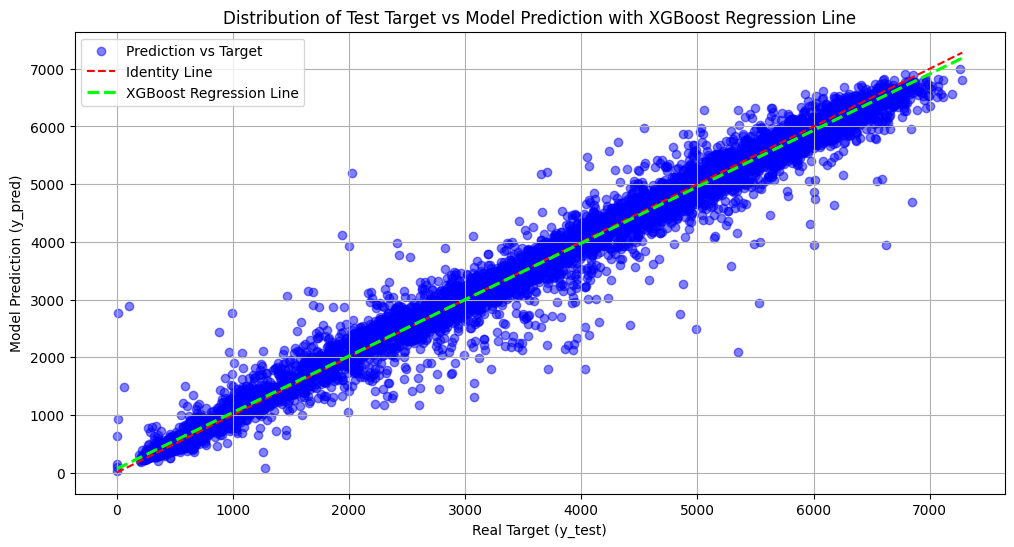

In [29]:
# Visualisasi
plt.figure(figsize=(12, 6))

# Scatter plot antara y_test dan y_pred
plt.scatter(y_test, y_preds, color='blue', alpha=0.5, label='Prediction vs Target')

# Tambahkan garis identitas
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Identity Line')

# Garis regresi linear
sns.regplot(x=y_test, y=y_preds, scatter=False, color='#00ff00', line_kws={'linestyle': '--'}, label='XGBoost Regression Line')

plt.xlabel('Real Target (y_test)')
plt.ylabel('Model Prediction (y_pred)')
plt.title('Distribution of Test Target vs Model Prediction with XGBoost Regression Line')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
import pickle
import os

# Buat direktori 'model' jika belum ada
os.makedirs('model', exist_ok=True)

# Simpan model ke dalam file pickle
model_path = 'model/xgb_regressor_model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model berhasil disimpan di {model_path}")

Model berhasil disimpan di model/xgb_regressor_model.pkl
